# Lab Segmentation 1

In [36]:
from commonfunctions import *
import skimage.io as io
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Requirement 1

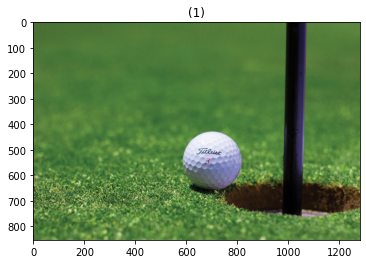

In [44]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf
image = io.imread('./imgs/exp1/golf.jpeg')
image_float = image.astype(float)
show_images([image])

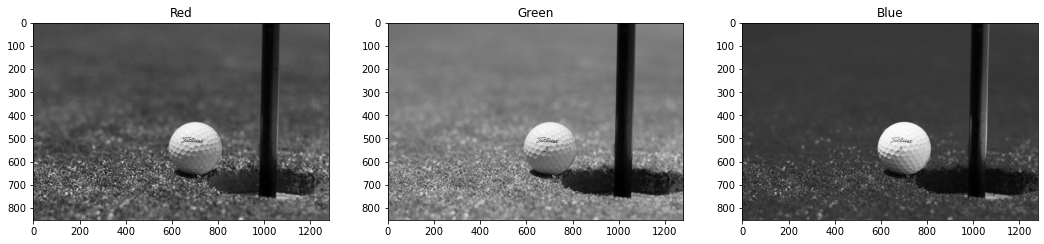

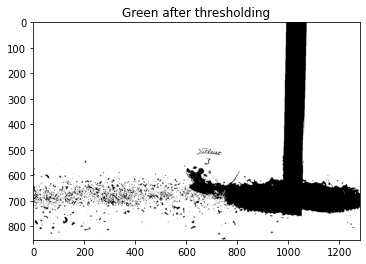

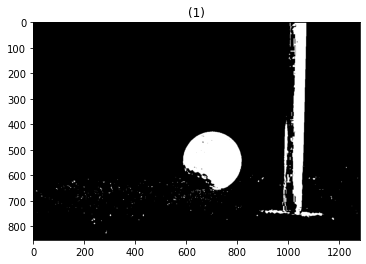

In [75]:
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
show_images([R,G,B],['Red','Green','Blue'])
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# ->  Green
# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
G_thes = G >= 100
show_images([G_thes],['Green after thresholding'])
# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
diff = G - B > 110
show_images([diff])
# 6- display the binarized image


### Requirement 2

In [68]:
# 1- Get the required RGB color (Using a color picker)
pixelValue = [86,101,42]
# 2- Read image
image_cufe = io.imread('./imgs/exp2/cufe.png')
# 3- extract R, G and B channels (as float)
R_float = image_cufe[:,:,0].astype(float)
G_float = image_cufe[:,:,1].astype(float)
B_float = image_cufe[:,:,2].astype(float)

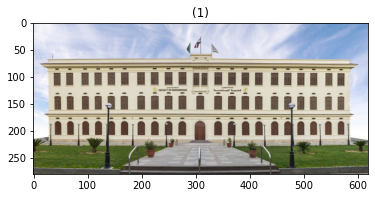

In [48]:
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it

show_images([image_cufe])